Pasirinkui boston_housing modelį patobulinimui.

In [ ]:
#pradinis kodas 1
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Activation, Dropout
from keras.activations import elu
import numpy as np
from keras.datasets import boston_housing
from sklearn.metrics import r2_score
from keras.layers import BatchNormalization


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
#pradinis kodas 2
def build_model():
  model = models.Sequential()

  model.add(layers.Input(shape=(train_data.shape[1],)))
  model.add(layers.Dense(32)) # activation='linear'
  # model.add(BatchNormalization(momentum=.5)) # ref: https://stackoverflow.com/a/37979391/1964707
  model.add(Activation(lambda x: elu(x, alpha=0.1)))
  model.add(Dropout(0.4))

  model.add(layers.Dense(32)) # activation='linear'
  # model.add(BatchNormalization(momentum=.5))
  model.add(Activation(lambda x: elu(x, alpha=0.1)))
  model.add(Dropout(0.4))

  model.add(layers.Dense(1))
  # no batch norm because no activation function for regression
  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [ ]:
#pradinis kodas 3
k = 4
num_val_samples = len(train_data) // k
num_epochs = 65
bs = 2
all_scores = []
r2_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=bs, verbose=1)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
  preds = model.predict(val_data)
  r2_scores.append(r2_score(val_targets, preds))
  all_scores.append(val_mae)

print(np.mean(all_scores))
print(np.mean(r2_scores))


Atnaujintas kodas su vizualizacijomis

Processing fold # 0
Epoch 1/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 508.2266 - mae: 21.0038 - val_loss: 325.9261 - val_mae: 15.8815
Epoch 2/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 255.7600 - mae: 13.6841 - val_loss: 69.6927 - val_mae: 5.7617
Epoch 3/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95.8527 - mae: 7.6469 - val_loss: 44.2220 - val_mae: 4.3821
Epoch 4/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.4076 - mae: 6.7400 - val_loss: 33.1915 - val_mae: 3.6350
Epoch 5/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67.8933 - mae: 6.2956 - val_loss: 36.4905 - val_mae: 3.9638
Epoch 6/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.0624 - mae: 6.6354 - val_loss: 31.9600 - val_mae: 3.6788
Epoch 7/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 66.3346 - mae: 6.0801 - val_loss: 25.0773 - val_mae: 3.2303
Epoch 8/65
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 75.9702 - mae: 6.6373 - val_loss: 23.8828 - val_mae: 3.2399
Epoch 9/65
152

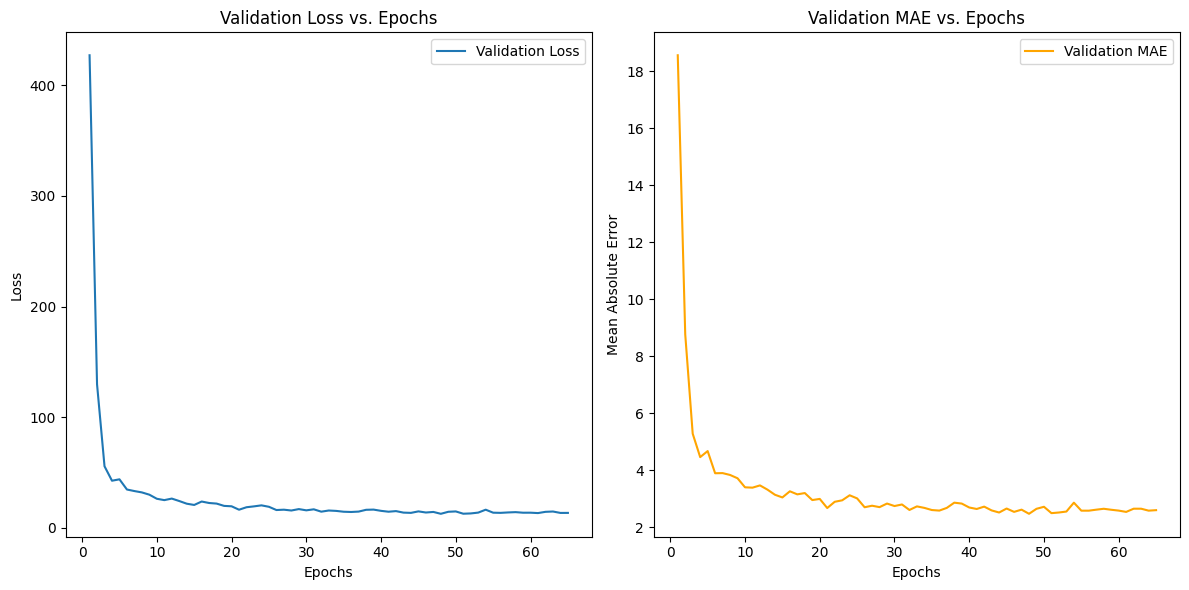

Epoch 1/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 564.7585 - mae: 21.9249
Epoch 2/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 210.1506 - mae: 11.2061
Epoch 3/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.8142 - mae: 6.7516
Epoch 4/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 79.2038 - mae: 6.7149
Epoch 5/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 86.1205 - mae: 7.2004
Epoch 6/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.2399 - mae: 6.1305
Epoch 7/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.9675 - mae: 5.8510
Epoch 8/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.1781 - mae: 6.0496
Epoch 9/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.5488 - mae: 5.8178
Epoch 10/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.3593 - mae: 5.5447
Epoch 11/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.3313 - mae: 5.6157
Epoch 12/65
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.8416 - mae: 5.3377
Epoch 13/

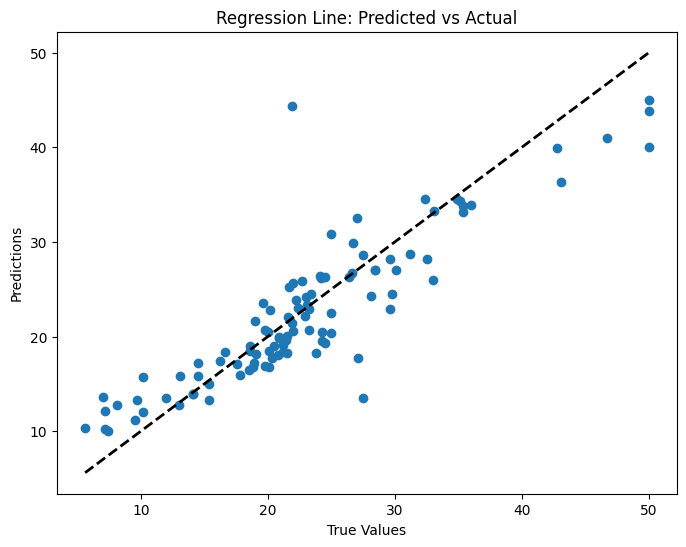

2.5959752798080444
0.8307922437940373


In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Activation, Dropout
from keras.activations import elu
import numpy as np
from keras.datasets import boston_housing
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization

# Load and preprocess data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Model building function
def build_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(train_data.shape[1],)))
    model.add(layers.Dense(32))
    model.add(Activation(lambda x: elu(x, alpha=0.1)))
    model.add(Dropout(0.4))

    model.add(layers.Dense(32))
    model.add(Activation(lambda x: elu(x, alpha=0.1)))
    model.add(Dropout(0.4))

    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# K-fold cross-validation setup
k = 4
num_val_samples = len(train_data) // k
num_epochs = 65
bs = 2
all_scores = []
r2_scores = []

# Lists for plotting
all_val_loss = []
all_val_mae = []

# Cross-validation loop
for i in range(k):
    print('Processing fold #', i)

    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()

    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=bs, validation_data=(val_data, val_targets), verbose=1)

    # Store validation loss and MAE for plotting
    all_val_loss.append(history.history['val_loss'])
    all_val_mae.append(history.history['val_mae'])

    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    preds = model.predict(val_data)
    r2_scores.append(r2_score(val_targets, preds))
    all_scores.append(val_mae)

# Calculate average metrics across all folds
print(np.mean(all_scores))
print(np.mean(r2_scores))

# Plot the training process (error/accuracy vs. epochs)
# Combine all fold results
val_loss_mean = np.mean(all_val_loss, axis=0)
val_mae_mean = np.mean(all_val_mae, axis=0)

plt.figure(figsize=(12, 6))

# Plot validation loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), val_loss_mean, label="Validation Loss")
plt.title('Validation Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation MAE
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_mae_mean, label="Validation MAE", color='orange')
plt.title('Validation MAE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize the regression line
# Use the model trained on all data for final predictions
final_model = build_model()
final_model.fit(train_data, train_targets, epochs=num_epochs, batch_size=bs, verbose=1)

# Predict on test data
predictions = final_model.predict(test_data)

# Scatter plot of predicted vs actual values (regression line)
plt.figure(figsize=(8, 6))
plt.scatter(test_targets, predictions)
plt.plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)
plt.title('Regression Line: Predicted vs Actual')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print(np.mean(all_scores))
print(np.mean(r2_scores))


atnaujintas kodas 2 su vizualizacijomis ir pakeitimais.
Pakeitimai batch 32 , 0,4 dropout, + Batch Normalization, Adam,RMSpromp optimizavimo algoritmas.

Tuning with dropout=0.2, batch_size=16, learning_rate=0.001, num_units=32
Validation MAE: 2.4125404357910156
Tuning with dropout=0.2, batch_size=16, learning_rate=0.001, num_units=64
Validation MAE: 2.330674171447754
Tuning with dropout=0.2, batch_size=16, learning_rate=0.001, num_units=128
Validation MAE: 2.078883409500122
Tuning with dropout=0.2, batch_size=16, learning_rate=0.0005, num_units=32
Validation MAE: 6.324174404144287
Tuning with dropout=0.2, batch_size=16, learning_rate=0.0005, num_units=64
Validation MAE: 2.4398863315582275
Tuning with dropout=0.2, batch_size=16, learning_rate=0.0005, num_units=128
Validation MAE: 2.199373960494995
Tuning with dropout=0.2, batch_size=16, learning_rate=0.0001, num_units=32
Validation MAE: 20.156078338623047
Tuning with dropout=0.2, batch_size=16, learning_rate=0.0001, num_units=64
Validation MAE: 19.01725959777832
Tuning with dropout=0.2, batch_size=16, learning_rate=0.0001, num_units=128
Validation MAE: 17.103858947753906
Tuning with dro

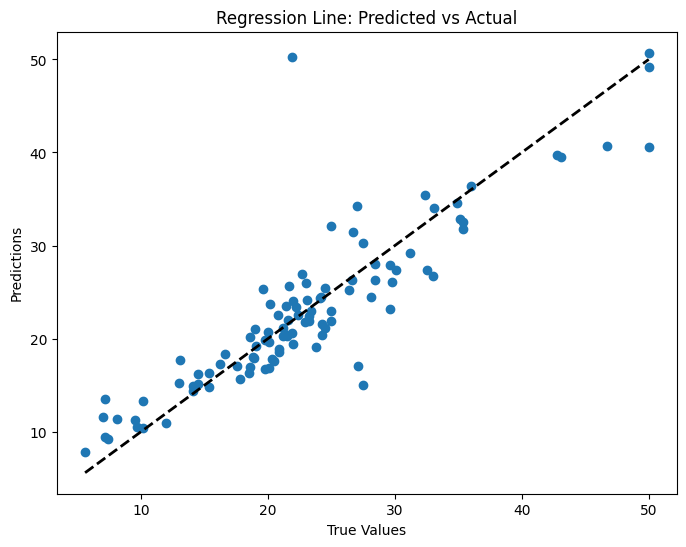

2.5719754099845886
0.8323091975688219


In [ ]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.layers import Activation, Dropout, BatchNormalization
from keras.optimizers import Adam, RMSprop
import numpy as np
from keras.datasets import boston_housing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Load and preprocess data
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

# Model building function with BatchNormalization and hyperparameters tuning
def build_model(dropout_rate=0.4, batch_size=32, learning_rate=0.001, num_units=32):
    model = models.Sequential()

    model.add(layers.Input(shape=(train_data.shape[1],)))
    model.add(layers.Dense(num_units))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(dropout_rate))

    model.add(layers.Dense(num_units))
    model.add(BatchNormalization())
    model.add(Activation('elu'))
    model.add(Dropout(dropout_rate))

    model.add(layers.Dense(1))

    # Compile the model with learning rate adjustments
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

# Hyperparameters tuning
dropout_rates = [0.2, 0.4, 0.5]
batch_sizes = [16, 32, 64]
learning_rates = [0.001, 0.0005, 0.0001]
num_units_list = [32, 64, 128]

best_score = float('inf')
best_params = {}

# Grid search over hyperparameters
for dropout_rate in dropout_rates:
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            for num_units in num_units_list:
                print(f'Tuning with dropout={dropout_rate}, batch_size={batch_size}, learning_rate={learning_rate}, num_units={num_units}')

                model = build_model(dropout_rate=dropout_rate, batch_size=batch_size, learning_rate=learning_rate, num_units=num_units)

                # Train the model
                history = model.fit(train_data, train_targets, epochs=65, batch_size=batch_size, validation_split=0.2, verbose=0)

                # Evaluate the model
                val_loss, val_mae = model.evaluate(train_data, train_targets, verbose=0)
                print(f'Validation MAE: {val_mae}')

                # Keep track of the best parameters based on validation MAE
                if val_mae < best_score:
                    best_score = val_mae
                    best_params = {
                        'dropout_rate': dropout_rate,
                        'batch_size': batch_size,
                        'learning_rate': learning_rate,
                        'num_units': num_units
                    }

# Print the best parameters
print(f'Best Parameters: {best_params}')

# Final model using best parameters
final_model = build_model(dropout_rate=best_params['dropout_rate'],
                          batch_size=best_params['batch_size'],
                          learning_rate=best_params['learning_rate'],
                          num_units=best_params['num_units'])

# Fit the final model on the entire training data
final_model.fit(train_data, train_targets, epochs=65, batch_size=best_params['batch_size'], verbose=1)

# Evaluate on test data
test_loss, test_mae = final_model.evaluate(test_data, test_targets)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Plot final results
# Predict on test data
predictions = final_model.predict(test_data)

# Scatter plot of predicted vs actual values (regression line)
plt.figure(figsize=(8, 6))
plt.scatter(test_targets, predictions)
plt.plot([test_targets.min(), test_targets.max()], [test_targets.min(), test_targets.max()], 'k--', lw=2)
plt.title('Regression Line: Predicted vs Actual')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

print(np.mean(all_scores))
print(np.mean(r2_scores))


Kas buvo patobulintas?

Pirmame pakeistame modelyje buvo prideta modelio veikimo vizualizacija. Ji parodo validacijos praradimą per epochas (1 grafikas).Antras grafikas parodo Validation mAES vs Epoch rodo, kaip vidutinė absoliuti klaida (mAES) keičiasi per epohas treniruojant modelį.Trečiame grafike (Regressions lines prediction vs accuracy) Regresijos linijos prognozės vs tikslumas – tai būdas įvertinti modelio prognozių kokybę.

Antrame pakeistame modelyje buvo prideta modelio veikimo vizualizacija ir pakeisti bei pridėti keli treniravimo rodikliai. Pakeitimai batch 32 , 0,4 dropout, + Batch Normalization, Adam,RMSpromp optimizavimo algoritmas.

Išvada

pirmas pakeistas su vizualizacija

*   all_scores 2.5959752798080444
*   r2_scores 0.8307922437940373

antras pakeistas su vizualizacija ir pakeistais treniravimo duomenimis

*   all_scores 2.5719754099845886
*   r2_scores 0.8323091975688219


